# Dimensionality Reduction using PCA on multivariate timeseries data
Written by @ansjin (Anshul Jindal) [anshul.jindal@tum.de]
Part of the blog : https://medium.com/@ansjin/dimensionality-reduction-using-pca-on-multivariate-timeseries-data-b5cc07238dc4?sk=150387dbe6650703ea93a4cbfc6ebc01

## Step1 : Import the required libraries

In [1]:
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting

## Step2 : Read the dataset

In [2]:
df = pd.read_csv('../data/processminer-rare-event-mts-data.csv', index_col = 0)
df.drop(['y','x61'], axis=1, inplace=True)
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60
time,,,,,,,,,,,,,,,,,,,,,
5/1/99 0:00,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,-0.059966,-0.038189,...,29.984624,10.091721,0.053279,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076
5/1/99 0:02,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,-0.059966,-0.038189,...,29.984624,10.095871,0.062801,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083
5/1/99 0:04,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,-0.030057,-0.018352,...,29.984624,10.100265,0.072322,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090
5/1/99 0:06,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,-0.019986,-0.008280,...,29.984624,10.104660,0.081600,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097
5/1/99 0:08,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,-0.030057,-0.008280,...,29.984624,10.109054,0.091121,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105


In [3]:
df.shape

(18399, 60)

## Step3 : Standardizing the data

In [4]:
X = df.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

## Step4 : Apply PCA

In [5]:
pca = PCA()
X_pca = pca.fit(X_std)

## Step5 : Determine the number of components

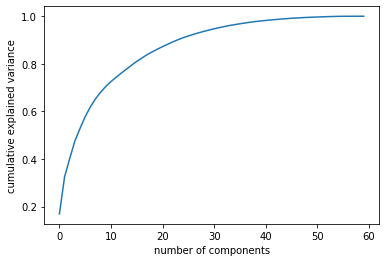

In [6]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Step6 : Dimensionality Reduction

In [7]:
num_components = 50
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

In [8]:
X_pca.shape

(18399, 50)

## Step4-6 together (optional) : Dimensionality Reduction

In [9]:
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(X_std) # this will fit and reduce dimensions
print(pca.n_components_) # one can print and see how many components are selected. In this case it is 4 same as above we saw in step 5

46


## Step7 : Finding the most important features set

In [10]:
pd.DataFrame(pca.components_, columns = df.columns)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60
0,-0.134978,-0.139511,-0.070098,-0.029532,-0.141758,-0.006428,-0.096201,-0.262014,-0.031776,-0.049155,...,-0.214859,0.052700,-0.048941,-0.089109,-0.107117,0.084321,0.075860,0.046994,-0.217500,0.057130
1,-0.107330,-0.041597,-0.119383,0.107416,0.179580,0.042543,-0.124571,-0.025042,-0.008209,-0.007408,...,-0.189798,-0.169403,0.014974,0.057301,0.026562,-0.119938,-0.191254,0.000242,-0.200275,-0.114196
2,-0.032852,-0.078462,0.044326,0.088569,0.050606,-0.283616,0.067711,-0.032507,0.073012,0.050304,...,0.091041,-0.258522,-0.103343,-0.121230,-0.328622,-0.274475,-0.205934,0.039758,0.101437,0.148342
3,-0.212448,-0.031898,0.285095,-0.184898,-0.041837,0.068215,0.070353,0.018779,0.007362,0.001878,...,-0.057283,-0.168391,-0.002031,0.366537,0.066511,-0.054012,-0.170885,-0.218926,-0.059216,0.083380
4,-0.075194,-0.015721,0.058409,0.187568,-0.040331,0.356130,-0.079268,-0.016805,-0.025974,-0.074920,...,0.103343,-0.169038,-0.108843,-0.009451,-0.177129,0.185442,-0.181199,-0.019647,0.111768,-0.151051
5,-0.087377,0.196033,-0.042822,-0.248259,0.025156,-0.105789,-0.239335,-0.005095,-0.270369,-0.213879,...,0.028226,0.002698,-0.106309,0.115286,0.021833,0.016505,-0.092247,0.337210,0.037978,0.137117
6,-0.117573,0.142314,0.014708,-0.178426,-0.088892,-0.017890,-0.079332,0.049583,0.380499,0.422003,...,-0.019491,0.029548,-0.174832,0.102448,0.081902,0.060203,-0.047768,0.164470,-0.015445,-0.024613
7,0.032289,0.149828,0.094727,0.069541,-0.247461,-0.044741,-0.095234,0.015399,-0.119245,-0.113956,...,-0.000685,-0.063964,-0.255217,0.091030,0.137353,0.018965,-0.005723,-0.057843,-0.006396,-0.296217
8,0.098434,0.051890,-0.250372,0.082027,0.040581,0.024728,0.016274,-0.015730,0.100071,0.091728,...,-0.002105,-0.122648,-0.098303,-0.134567,-0.010596,0.172003,-0.096605,0.208641,-0.009292,-0.077091
9,0.056334,-0.291987,-0.039952,-0.041860,0.145142,-0.036400,0.231111,0.073190,0.003557,-0.144573,...,-0.028108,0.025336,-0.441322,-0.014217,-0.008004,-0.116280,0.019450,0.000592,-0.026294,0.061791


In [11]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [12]:
most_important_names

['x37',
 'x30',
 'x55',
 'x54',
 'x34',
 'x58',
 'x10',
 'x60',
 'x21',
 'x53',
 'x43',
 'x43',
 'x31',
 'x41',
 'x20',
 'x14',
 'x60',
 'x48',
 'x46',
 'x3',
 'x46',
 'x40',
 'x53',
 'x1',
 'x40',
 'x2',
 'x9',
 'x8',
 'x19',
 'x17',
 'x5',
 'x60',
 'x56',
 'x5',
 'x28',
 'x17',
 'x10',
 'x35',
 'x26',
 'x13',
 'x51',
 'x18',
 'x18',
 'x30',
 'x30',
 'x51']